In [1]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import quantum as qm
import asymmetric as asym
import scipy.sparse.linalg as spla
import importlib
importlib.reload(asym)

<module 'asymmetric' from '/Users/cstahl/Documents/Research/Asymmetric/python/Hamiltonian/asymmetric.py'>

# Naive

In [2]:
L = 5
_,x_list,y_list, z_list = qm.get_sigma_lists(L, half=False)
H = asym.dense_H(L)
Z0 = z_list[0]

In [3]:
end = 20; n = 3; tot = end*n
OTOCs = np.zeros((L,tot))
for T in range(tot):
    t = T/n
    U    = spla.expm(-1j*H*t)
    Uinv = spla.expm( 1j*H*t)
    Z0t = Uinv*Z0*U
    for i in range(L):
        OTOCs[i, T] = 1-np.real((Z0t*z_list[i]*Z0t*z_list[i]).diagonal().sum())/2**L

/Users/cstahl/anaconda3/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/cstahl/anaconda3/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


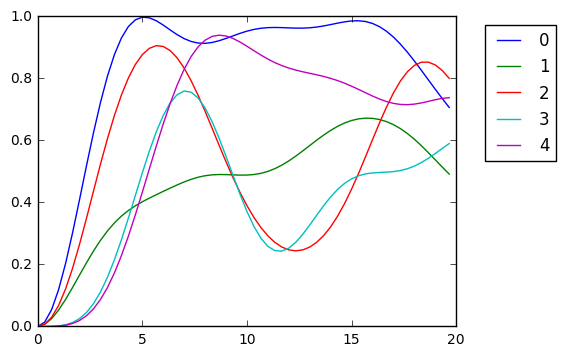

In [4]:
ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(tot)/n, OTOCs[i], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
# plt.ylim(0,1)
plt.show()

# Block Diagonal

In [5]:
def expm(a):
    if (a.shape[0]==1): return np.array([[np.exp(a[0,0])]])
    return spla.expm(a).A

In [6]:
Hlist  = asym.mat2list(H)
Zlists = [asym.mat2list(Z) for Z in z_list]
Z0list = Zlists[0]

In [14]:
end = 20; n = 3; tot = end*n
OTOCs = np.zeros((L,tot))
for T in range(tot):
    t = T/n
    Ulist    = [spla.expm(-1j*H*t) for H in Hlist]
    Ulistinv = [spla.expm( 1j*H*t) for H in Hlist]
    Z0tlist  = [Ui@Z0@U for (Ui, Z0, U) in zip(Ulistinv, Z0list, Ulist)]

    for i in range(L):
        corr = [Z0t@Zi@Z0t@Zi for (Z0t, Zi) in zip(Z0tlist, Zlists[i])]
        OTOCs[i, T] = 1-sum([c.diagonal().sum().real for c in corr])/2**L

/Users/cstahl/anaconda3/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:295: SparseEfficiencyWarning: splu requires CSC matrix format
  warn('splu requires CSC matrix format', SparseEfficiencyWarning)
/Users/cstahl/anaconda3/lib/python3.5/site-packages/scipy/sparse/linalg/dsolve/linsolve.py:202: SparseEfficiencyWarning: spsolve is more efficient when sparse b is in the CSC matrix format
  'is in the CSC matrix format', SparseEfficiencyWarning)


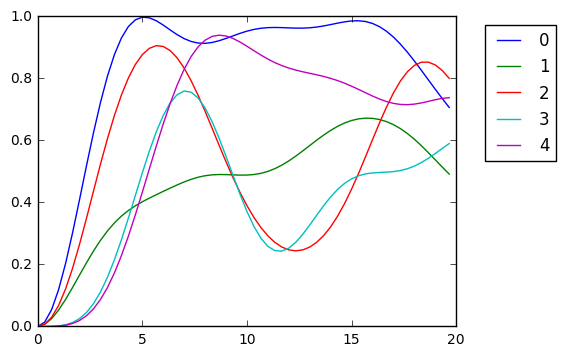

In [15]:
ax = plt.subplot(111)
for i in range(L):
    ax.plot(np.arange(tot)/n, OTOCs[i], label = str(i))
box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.9, box.height])
ax.legend(bbox_to_anchor=(1.05, 1), loc=2)
# plt.ylim(0,1)
plt.show()

# expm_multiply with matrices

In [9]:
e = spla.expm_multiply
end = 20; n = 3; tot = end*n
OTOCs = np.zeros((L,tot))
for T in range(tot):
    t = T/n
    Ulist    = [expm(-1j*H*t) for H in Hlist]
    Ulistinv = [expm( 1j*H*t) for H in Hlist]
    
                Ui@Z0@U@Zi@Ui@Z0@U@Zi

    for i in range(L):
        corr = [e(1j*H*t, Z0@e(-1j*H*t, Zi@e(1j*H*t, Z0@e()))) for (Z0, Zi) in zip(Z0list, Zlists[i])]
        OTOCs[i, T] = 1-sum([c.trace().real for c in corr])/2**L

IndentationError: unexpected indent (<ipython-input-9-42a3fbb19939>, line 9)

In [ ]:
list(map(np.square, [1,2,3,4]))

In [ ]:
a = [1,2,3,4]
b = [2,3,4,5]
print([c*d for (c,d) in zip(a,b)])

In [ ]:
alph = 1
print([alph**2 for alph in [1,2,3,4]])
print(alph)

In [ ]:
qm.chop(Ulist[2]@Z0list[2]-Ulist[2]*Z0list[2])

In [ ]:
%timeit U@Uinv

In [ ]:
A = np.array([1, -1])
for i in range(L-1):
    A = np.kron(A,np.array([1,1]))

In [ ]:
spla.expm(H[:2,:2])

In [ ]:
a = H[:4,:4]
a[0,0] = 1
a[1,2] = .6
a.A

In [ ]:
type(Ulist[1])

In [ ]:
H@H[:-1]

In [ ]:
def scity(A):
    return np.isclose(A,0).sum()/np.prod(A.shape)

In [ ]:
for U in Ulist:
    print(np.isclose(U.A,0).sum()/np.prod(U.A.shape))

In [ ]:
print(np.isclose(U.A,0).sum()/np.prod(U.A.shape))